In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn
seaborn.set_context('talk')

from sqlalchemy import create_engine, text

**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2023*

----

# Trabajo práctico entregable - parte 1

En esta notebook, vamos a cargar el conjunto de datos de [la compentencia Kaggle](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot) sobre estimación de precios de ventas de propiedades en Melbourne, Australia.

Utilizaremos el conjunto de datos reducido producido por [DanB](https://www.kaggle.com/dansbecker). Hemos subido una copia a un servidor de la Universidad Nacional de Córdoba para facilitar su acceso remoto.

In [2]:
import plotly
plotly.__version__


'5.9.0'

In [3]:
df_melb = pd.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv')
df_melb[:3]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


In [4]:
df_melb.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

## Ejercicio 1 SQL: 

1. Crear una base de datos en SQLite utilizando la libreria [SQLalchemy](https://stackoverflow.com/questions/2268050/execute-sql-from-file-in-sqlalchemy).
https://docs.sqlalchemy.org/en/14/core/engines.html#sqlite

2. Ingestar los datos provistos en 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv' en una tabla y el dataset generado en clase con datos de airbnb y sus precios por codigo postal en otra.

3. Implementar consultas en SQL que respondan con la siguiente información:

    - cantidad de registros totales por ciudad.
    - cantidad de registros totales por barrio y ciudad.

4. Combinar los datasets de ambas tablas ingestadas utilizando el comando JOIN de SQL  para obtener un resultado similar a lo realizado con Pandas en clase.  



#### 1.

**creacion de base de datos**

In [5]:
engine = create_engine('sqlite:///DataBase.sqlite3', echo=True)   #create database file called 'DataBase.sqlite3' where
                                                                  #the two tables are going
                                                                  #to be stored.

### 2.
**Ingestando las tablas**

In [6]:
df_airbnb = pd.read_csv("airbnb_price_by_zipcode.csv")
df_airbnb.head(200)

,zipcode,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,airbnb_monthly_price_mean
0,2010.0,40.000000,1,NaN,NaN
1,2134.0,50.000000,1,NaN,NaN
2,2582.0,104.000000,1,NaN,NaN
3,3000.0,150.504307,3367,918.738956,3407.204651
4,3001.0,132.500000,2,NaN,NaN
...,...,...,...,...,...
195,3767.0,215.666667,42,814.000000,2784.500000
196,3770.0,396.166667,24,1050.000000,3200.000000
197,3775.0,337.688889,45,733.166667,2800.000000
198,3777.0,271.256684,187,1278.512195,3802.187500


In [7]:
df_melb.to_sql('melb_data', con=engine, if_exists="replace")      #create table named 'melb_data' into 'Database.sqlite3' file
df_airbnb.to_sql('airbnb_data', con=engine, if_exists="replace")    #create table named 'airbnb_data'  into 'Database.sqlite3' file

2023-06-03 20:52:42,890 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("melb_data")
2023-06-03 20:52:42,897 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-06-03 20:52:42,903 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("melb_data")
2023-06-03 20:52:42,905 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-06-03 20:52:42,912 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2023-06-03 20:52:42,914 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-06-03 20:52:42,916 INFO sqlalchemy.engine.Engine PRAGMA main.table_xinfo("melb_data")
2023-06-03 20:52:42,917 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-06-03 20:52:42,921 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = 'table'
2023-06-03 20:52:42,922 INFO sqlalchemy.engine.Engine [raw sql] ('melb_data',)
2023-06-03 20:52:42,925 INFO sqlalchemy.engine.Engine PRAGMA main.foreign_key_list("

2023-06-03 20:52:43,565 INFO sqlalchemy.engine.Engine PRAGMA main.index_info("ix_airbnb_data_index")
2023-06-03 20:52:43,566 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-06-03 20:52:43,568 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = 'table'
2023-06-03 20:52:43,568 INFO sqlalchemy.engine.Engine [raw sql] ('airbnb_data',)
2023-06-03 20:52:43,574 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2023-06-03 20:52:43,579 INFO sqlalchemy.engine.Engine 
DROP TABLE airbnb_data
2023-06-03 20:52:43,580 INFO sqlalchemy.engine.Engine [no key 0.00102s] ()
2023-06-03 20:52:43,590 INFO sqlalchemy.engine.Engine COMMIT
2023-06-03 20:52:43,595 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2023-06-03 20:52:43,597 INFO sqlalchemy.engine.Engine 
CREATE TABLE airbnb_data (
	"index" BIGINT, 
	zipcode FLOAT, 
	airbnb_price_mean FLOAT, 
	airbnb_record_count BIGINT, 
	airbnb_weekly_price_mean FLOAT, 
	airbnb

247

### 3.
- cantidad de registros totales por ciudad.

In [8]:
query1 = "SELECT CouncilArea, COUNT(*) FROM melb_data GROUP BY CouncilArea" 

In [9]:
with engine.connect() as con:
      rs = con.execute(text(query1))
      df_rs = pd.DataFrame(rs.fetchall())  #inserting list of tuples (query return) into a DataFrame object for visualization
      for row in rs:
          print(row)

2023-06-03 20:52:43,695 INFO sqlalchemy.engine.Engine SELECT CouncilArea, COUNT(*) FROM melb_data GROUP BY CouncilArea
2023-06-03 20:52:43,696 INFO sqlalchemy.engine.Engine [generated in 0.00119s] ()


In [10]:
df_rs.head(10)  #displaying result of query 1 

,CouncilArea,COUNT(*)
0,None,1369
1,Banyule,594
2,Bayside,489
3,Boroondara,1160
4,Brimbank,424
5,Cardinia,8
6,Casey,38
7,Darebin,934
8,Frankston,53
9,Glen Eira,848


- cantidad de registros totales por barrio y ciudad.

In [11]:
query2 = "SELECT Suburb, CouncilArea, COUNT(*) FROM melb_data GROUP BY Suburb" 

In [12]:
with engine.connect() as con:
      request2 = con.execute(text(query2))
      df_request2 = pd.DataFrame(request2.fetchall())  #inserting list of tuples (query return) into a DataFrame object for visualization
      for row in request2:
          print(row)

2023-06-03 20:52:43,793 INFO sqlalchemy.engine.Engine SELECT Suburb, CouncilArea, COUNT(*) FROM melb_data GROUP BY Suburb
2023-06-03 20:52:43,798 INFO sqlalchemy.engine.Engine [generated in 0.00362s] ()


In [13]:
df_request2.head(20)

,Suburb,CouncilArea,COUNT(*)
0,Abbotsford,Yarra,56
1,Aberfeldie,Moonee Valley,44
2,Airport West,Moonee Valley,67
3,Albanvale,Brimbank,6
4,Albert Park,Port Phillip,69
5,Albion,Brimbank,41
6,Alphington,Darebin,34
7,Altona,Hobsons Bay,74
8,Altona Meadows,Hobsons Bay,6
9,Altona North,Hobsons Bay,56


### 4.
**Join**

In [14]:
query3 = """SELECT *

            FROM
                 melb_data
            LEFT JOIN airbnb_data ON
                melb_data.Postcode = airbnb_data.zipcode
         """

In [15]:
with engine.connect() as con:
      request3 = con.execute(text(query3))
      df_Joined = pd.DataFrame(request3.fetchall()) #inserting list of tuples (query return) into a DataFrame object for visualization
      for row in request3:
          print(row)

2023-06-03 20:52:43,903 INFO sqlalchemy.engine.Engine SELECT *

            FROM
                 melb_data
            LEFT JOIN airbnb_data ON
                melb_data.Postcode = airbnb_data.zipcode
         
2023-06-03 20:52:43,905 INFO sqlalchemy.engine.Engine [generated in 0.00196s] ()


In [16]:
df_Joined[['zipcode','Postcode']].head(10)  #checking for succesful pairing

,zipcode,Postcode
0,3067.0,3067.0
1,3067.0,3067.0
2,3067.0,3067.0
3,3067.0,3067.0
4,3067.0,3067.0
5,3067.0,3067.0
6,3067.0,3067.0
7,3067.0,3067.0
8,3067.0,3067.0
9,3067.0,3067.0


In [17]:
# A more robust checking

zipcode_postcode_matching = pd.DataFrame()
zipcode_postcode_matching['match'] = pd.Series(df_Joined['zipcode'] == df_Joined['Postcode'])

number_of_elements = zipcode_postcode_matching.shape[0]
number_of_matchs = zipcode_postcode_matching.loc[zipcode_postcode_matching['match']].shape[0]

print(f'Total number of elements: {number_of_elements}')
print(f'Total number of matchs: {number_of_matchs}')
zipcode_postcode_matching.loc[~zipcode_postcode_matching['match']]

Total number of elements: 13580
Total number of matchs: 13560


,match
6817,False
6818,False
8717,False
8817,False
9549,False
10033,False
10576,False
10938,False
11032,False
11371,False


## Ejercicio 2 - Pandas: 

1. Seleccionar un subconjunto de columnas que les parezcan relevantes al problema de predicción del valor de la propiedad. Justificar las columnas seleccionadas y las que no lo fueron.
 - Eliminar los valores extremos que no sean relevantes para la predicción de valores de las propiedades.

 
2. Agregar información adicional respectiva al entorno de una propiedad a partir del [conjunto de datos de AirBnB](https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv) utilizado en el práctico. 
  1. Seleccionar qué variables agregar y qué combinaciones aplicar a cada una. Por ejemplo, pueden utilizar solo la columna `price`, o aplicar múltiples transformaciones como la mediana o el mínimo.
  1. Utilizar la variable zipcode para unir los conjuntos de datos. Sólo incluir los zipcodes que tengan una cantidad mínima de registros (a elección) como para que la información agregada sea relevante.
  2. Investigar al menos otras 2 variables que puedan servir para combinar los datos, y justificar si serían adecuadas o no. Pueden asumir que cuentan con la ayuda de anotadores expertos para encontrar equivalencias entre barrios o direcciones, o que cuentan con algoritmos para encontrar las n ubicaciones más cercanas a una propiedad a partir de sus coordenadas geográficas. **NO** es necesario que realicen la implementación.

Pueden leer otras columnas del conjunto de AirBnB además de las que están en `interesting_cols`, si les parecen relevantes.

# Inciso 1

In [18]:
df_melb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

Elijo algunas columnas como para empezara  escribir codigo.

In [19]:
relevant_columns = ['Suburb','Rooms','Type','Bedroom2','Bathroom','Car','Landsize','YearBuilt','CouncilArea','Price','Postcode']

In [20]:
df_relevant_columns = df_melb[relevant_columns]
df_relevant_columns.columns

Index(['Suburb', 'Rooms', 'Type', 'Bedroom2', 'Bathroom', 'Car', 'Landsize',
       'YearBuilt', 'CouncilArea', 'Price', 'Postcode'],
      dtype='object')

In [21]:
df_relevant_columns.describe() #observing numeric variables, i dont care about Postcode really, its categorical

,Rooms,Bedroom2,Bathroom,Car,Landsize,YearBuilt,Price,Postcode
count,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,8205.000000,1.358000e+04,13580.000000
mean,2.937997,2.914728,1.534242,1.610075,558.416127,1964.684217,1.075684e+06,3105.301915
std,0.955748,0.965921,0.691712,0.962634,3990.669241,37.273762,6.393107e+05,90.676964
min,1.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,8.500000e+04,3000.000000
25%,2.000000,2.000000,1.000000,1.000000,177.000000,1940.000000,6.500000e+05,3044.000000
50%,3.000000,3.000000,1.000000,2.000000,440.000000,1970.000000,9.030000e+05,3084.000000
75%,3.000000,3.000000,2.000000,2.000000,651.000000,1999.000000,1.330000e+06,3148.000000
max,10.000000,20.000000,8.000000,10.000000,433014.000000,2018.000000,9.000000e+06,3977.000000


#### Hago boxplots para ver los outliers

<Axes: >

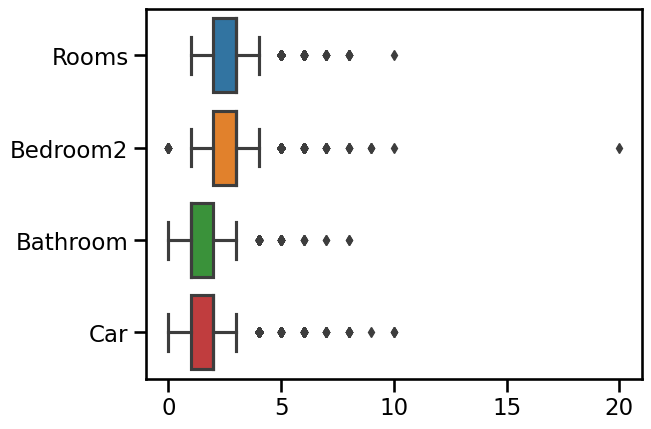

In [22]:
numeric_columns = ['Rooms','Bedroom2','Bathroom','Car','Landsize','YearBuilt','Price'] #this will come in handy later
seaborn.boxplot(data=
                df_relevant_columns[['Rooms','Bedroom2','Bathroom','Car']],
                orient ="h") #'landsize','YearBuilt' and 'Price' are Plotted separately for readability

<Axes: >

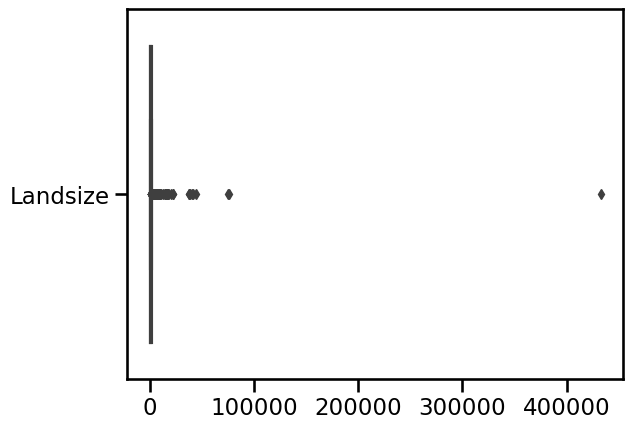

In [23]:
seaborn.boxplot(data=df_relevant_columns[['Landsize']],orient="h")

<Axes: >

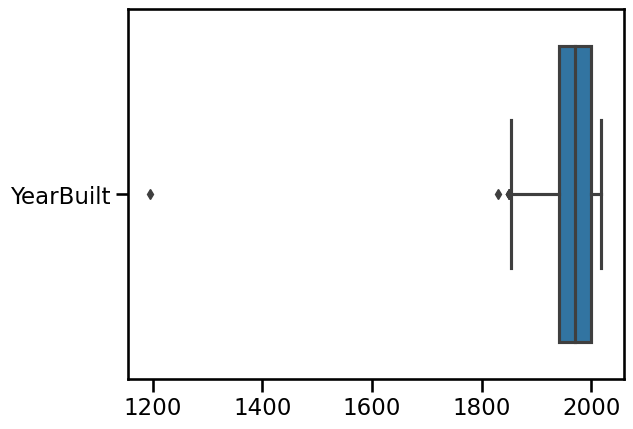

In [24]:
seaborn.boxplot(data=df_relevant_columns[['YearBuilt']],orient="h")

<Axes: >

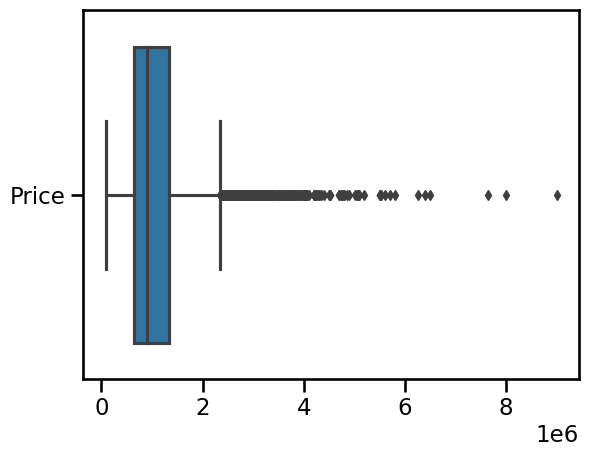

In [25]:
seaborn.boxplot(data=df_relevant_columns[['Price']],orient="h")

In [26]:
df_relevant_columns[df_relevant_columns['Landsize']==433014.000000]['Price']#We can see that the maximun value of 'Landsize'
                                                                            #has a price of just 2.7e6, seems odd.                

11020    2700000.0
Name: Price, dtype: float64

#### Voy a limpiar todos los outliers, esto no es nada definitivo simplemente estoy avanzando con el codigo, despues decidimos.

In [29]:
q_low = df_relevant_columns.select_dtypes(include=np.number)
q_low

for column in numeric_columns:
    q_low = df_relevant_columns[column].quantile(0.25)
    q_hi  = df_relevant_columns[column].quantile(0.75)
    df_filtered = df_relevant_columns[(df_relevant_columns[column] < q_hi) 
                                  & (df_relevant_columns[column] > q_low)]

In [30]:
df_filtered #i was left with only 6696 rows, we have to improve the filtering as i mentioned.

,Suburb,Rooms,Type,Bedroom2,Bathroom,Car,Landsize,YearBuilt,CouncilArea,Price,Postcode
1,Abbotsford,2,h,2.0,1.0,0.0,156.0,1900.0,Yarra,1035000.0,3067.0
3,Abbotsford,3,h,3.0,2.0,1.0,94.0,NaN,Yarra,850000.0,3067.0
5,Abbotsford,2,h,2.0,1.0,0.0,181.0,NaN,Yarra,941000.0,3067.0
9,Abbotsford,2,h,3.0,1.0,2.0,220.0,1900.0,Yarra,1097000.0,3067.0
10,Abbotsford,2,u,2.0,2.0,1.0,0.0,NaN,Yarra,700000.0,3067.0
...,...,...,...,...,...,...,...,...,...,...,...
13570,Wantirna South,3,h,3.0,2.0,2.0,674.0,NaN,NaN,970000.0,3152.0
13575,Wheelers Hill,4,h,4.0,2.0,2.0,652.0,1981.0,NaN,1245000.0,3150.0
13576,Williamstown,3,h,3.0,2.0,2.0,333.0,1995.0,NaN,1031000.0,3016.0
13577,Williamstown,3,h,3.0,2.0,4.0,436.0,1997.0,NaN,1170000.0,3016.0


# Inciso 2

In [ ]:
df_airbnb

## Ejercicio 3:

Crear y guardar un nuevo conjunto de datos con todas las transformaciones realizadas anteriormente.

## Ejercicios opcionales:

1. Armar un script en python (archivo .py) [ETL](https://towardsdatascience.com/what-to-log-from-python-etl-pipelines-9e0cfe29950e) que corra los pasos de extraccion, transformacion y carga, armando una funcion para cada etapa del proceso y luego un main que corra todos los pasos requeridos.

2. Armar un DAG en Apache Airflow que corra el ETL. (https://airflow.apache.org/docs/apache-airflow/stable/tutorial.html)